# 지리 정보 데이터 처리

지리정보데이터, GIS(Geospatial Information System) 라고 말하는 것은 위치에 대한 정보를 광범위하게 포함하는 말이다. 예로는 좌표, 주소, 도시 , 우편번호 등이 있다. 이 절에서는 지리정보를 처리하는데 유용한 패키지와 지리 정보 데이터를 처리하는 방법에 대해 설명할 것이다. 

## GeoPandas

GeoPandas는 파이썬에서 지리정보 데이터 처리의 기하하적 연산과 시각화 등을 돕는 패키지이다. 
이름으로도 알 수 있듯이, GeoPandas는 Pandas와 비슷하다. 두 가지의 자료형 `GeoSeries`와 `GeoDataFrame`이 있다. 다루는 방법에 큰 차이가 없다. 다만 지리정보 데이터 분석에 유용한 속성과 메서드가 존재한다. 다음처럼 `gpd`라는 이름으로 임포트 하는 것이 관례이다.

In [2]:
!pip3 install geopandas

     |████████████████████████████████| 994 kB 9.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 9.3 MB/s eta 0:00:01


In [1]:
import geopandas as gpd
gpd.__version__

'0.9.0'

GeoPandas는 간단한 지리정보데이터를 실습 할 수 있는 샘플 데이터 셋을 제공한다. 이 데이터를 사용해 GeoPandas의 기초적인 기능을 학습하겠다. 
이 실습 데이터는 `gpd.dataset.get_path()` 명령으로 데이터의 링크를 불러와 사용 한다. 

In [2]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

# 지리정보가 POLYGON형태로 들어가 있다. 

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [3]:
cities.tail()

# 지리정보가 POINT 형태로 들어가 있다. 

,name,geometry
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


#### 지리 정보의 시각화

GeoSeries와 GeoDataFrame 객체의 `plot()`명령을 사용하면, GeoPandas 내부의 Geometry 데이터를 손쉽게 시각화 할 수 있다. 
이 때, Geometry 데이터는 지리정보를 표현하는 다각형, 선, 점을 의미하는데, GeoPandas는 내부적으로 다각형, 선, 점을 **Shapely** 패키지를 사용하여 처리한다. 각 Polygon, LineString, Point 로 정의되어 있다. GeoPandas가 제공하는 데이터에는 Geometry 데이터가 이미 포함되어 있지만, 우리가 가진 데이터를 활용해 생성할 수도 있다. 이 부분은 다음 부분에서 학습 하겠다. 

대부분의 경우 지리정보를 시각화 할 때는 위치에 따른 정보의 변화를 함께 표현한다. 이 때는 `plot()` 명령의 `column` 인자에 반영하고 싶은 데이터의 열 이름을 입력하면 해당 열의 데이터를 색(color)으로 표현한다. 표현하려는 정보가 카테고리 데이터 일때는 `categorical`인자를 True로 설정한다. 

그런데 컬럼이 continent처럼 범주형도 있는데, 숫자형도 있잖아. <br>
범주형일때는, categorical, 실수형일때는 컬러맵을 설정해 줘야 표시해준다. 

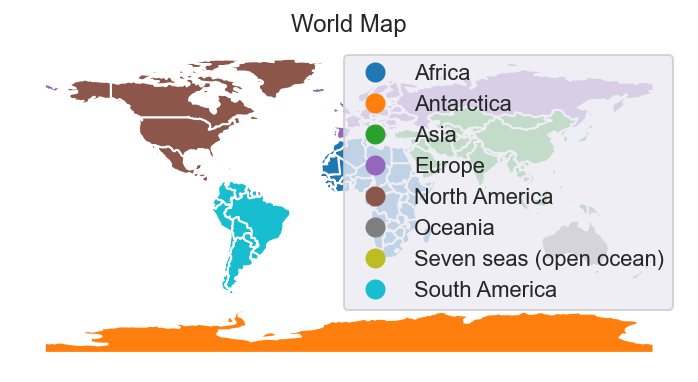

In [6]:
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("World Map")
ax.set_axis_off()
plt.show()

# 내가 표시하고자 하는 컬럼이 색상으로 나타나게 된다. 

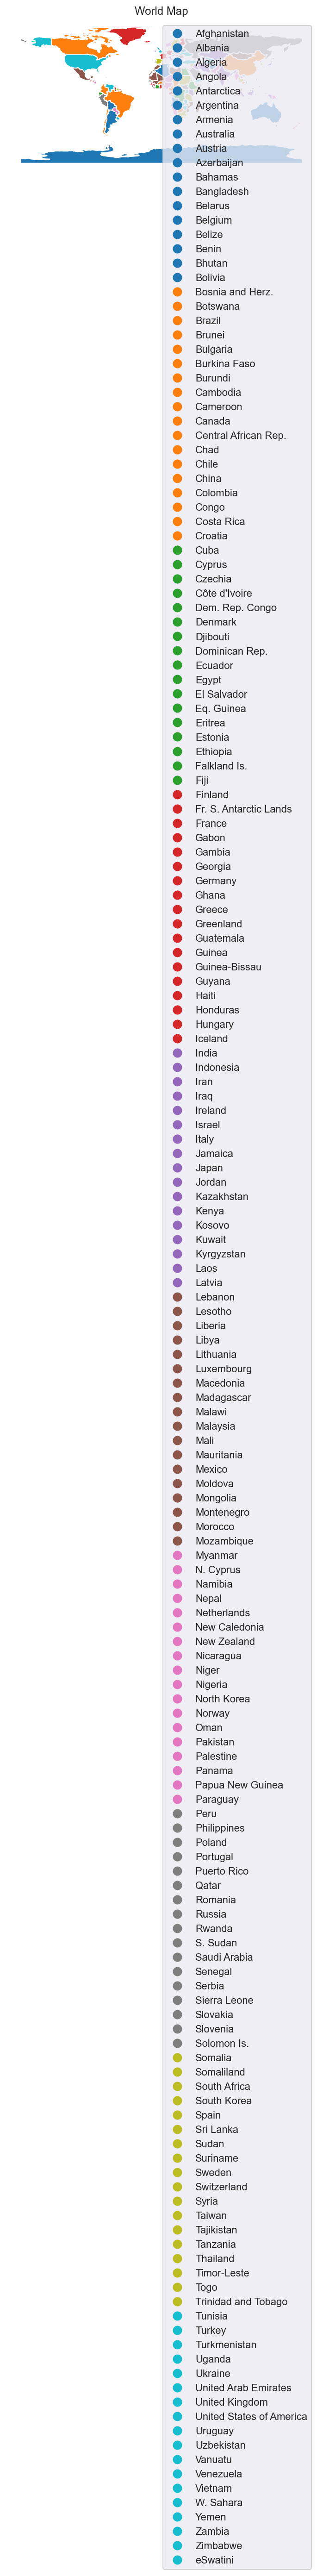

In [8]:
ax = countries.plot(column="name", legend=True, categorical=True)
ax.set_title("World Map")
ax.set_axis_off()
plt.show()

# 내가 표시하고자 하는 컬럼이 색상으로 나타나게 된다. 

만약, 표현하고 싶은 컬럼이 실수 변수라면, 색을 변화시키는 기준 즉 데이터를 구분하는 방법과 갯수를 정의할 수 있다. 먼저 구분하는 방법은 `plot()`명령의 `scheme` 인자로 설정하는데, 지원하는 것으로는 "Equal_interval"(동일한 간격으로 구분), "Quantiles"(4분위수를 구하여 구분), "Fisher_Jenks"(클래스 내 분산을 줄이고, 클래스 끼리의 분산을 최대화하는 방식으로 구분)가 있다. 구분하는 갯수는 `k` 인자에 원하는 숫자를 입력하면된다. 디폴트는 5이다.  

다음 코드는 국가별 GDP 추정치를 해당 국가의 추정인구로 나누어, 추정 1인당 GDP를 만들고, 이를 지도에서 색으로 표현한 예이다. 

추가적으로, 정보를 색으로 나타낼 때는 표현하려는 정보에 따라, 컬러맵을 설정하는 것이 좋다. 이 예와 같이 수치적인 정보를 시각화 할 때는, 수치만큼 색이 밝고 어두워지는 것으로 표현하는 것이 더 적절하기 때문에 Sequence 계열의 컬러맵을 설정하는 것이 좋다. 컬러맵에 대해서는 이 곳을 참고하길 바란다.(https://matplotlib.org/users/colormaps.html)

In [11]:
!pip3 install mapclassify

scheme에 따라서, 다르게 표현해 주는데, 현재 quantile은 n등분해서 나타내 준다. 

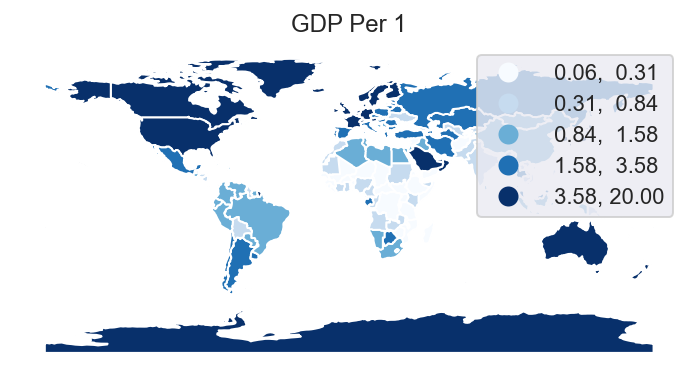

In [13]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("GDP Per 1")
plt.show()

### Geometry 데이터

이전에 언급 했듯이, GeoPandas에서는 Shapely라는 패키지를 통해 Geometry 데이터를 처리한다. 여기서는 Geometry 데이터에 대해서 공부해보도록 하자. 

#### Polygons

점들이 연결되서 형성해 주는 것. 

한 국가의 영토 따위 등은 여러 개의 점을 이은 다각형으로 나타낼 수 있다. "Countries" 데이터에서는 다음처럼 Polygon 데이터를 제공한다. 

In [14]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

In [15]:
# 여러 개의 점(Point)들로 이루어져있다.
print(countries.geometry[113])

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575 53.47012156840655, 23.80493493011778 53.08973135030607, 23.79919884613338 52.69109935160657, 23.19949384938619 52.48697744405367, 23.50800215016869 52.02364655212473, 23.52707075368437 51.57845408793031, 24.0299857927489 50.70540660257518, 23.92275719574326 50.42488108987874, 23.42650841644439 50.30850576435745, 22.5184501482116 49.47677358661974, 22.77641889821263 49.02739533140962, 22.55813764821175 49.08573802346714, 21.60780805836421 49.47010732685409, 20.88795535653841 49.32877228453583, 20.41583947111985 49.43145335549977, 19.82502282072687 49.21712535256923, 19.32071251799047 49.57157400165919, 18.90957482267632 49.43584585224458, 18.85314415861362 49.49622976337764, 18.39291385262217 49.98862864847075, 17.64944502123899 50.04903839781996, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.71947594571444 50.21574656839354, 16.17625328946227 50.42260732685791, 16.23862674323857 50.69773265237

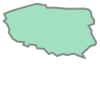

In [16]:
countries.geometry[113]

#### Points 

도시는 점으로 찍혀있네

어떤 사건이 발생한 위치, 한 국가의 수도, 두 국가간의 중앙점 등은 하나의 좌표로 나타낼 수 있다. "Cities" 데이터에서는 도시를 하나의 점으로 나타내었다. 이 점을 다음처럼 지도위에 표현 할 수 있다. 

In [17]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

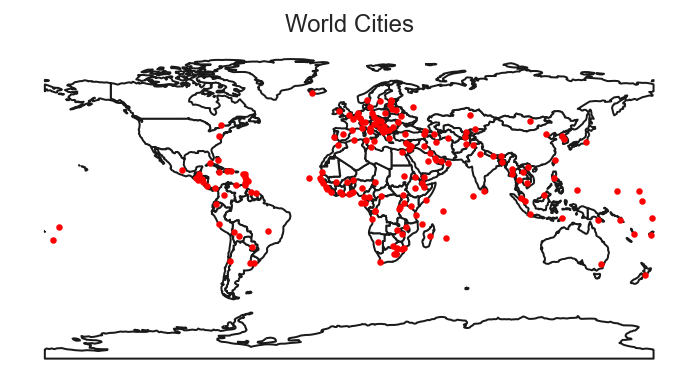

In [18]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("World Cities")
plt.show()

#### LineString 

점과 점을 이은 것은 선이 된다. 두 도시 사이의 길, 강의 흐름, 국경의 생김새, 경계면 정보 등을 선으로 나타낼 수 있겠다. 다음 코드는 우리나라의 육지를 선으로 나타낸 것이다.  여기서 사용되는 `squeeze()`함수는 GeoPandas 객체에서 Geometry 데이터 만을 추출해주는 기능을 한다. `boundary` 속성에 대해서는 다음 단락에서 학습 하겠다. 

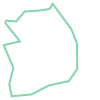

In [19]:
korea_border = countries[countries.name == "South Korea"].geometry
# 버전 6.x에서는 "South Korea"를 사용해야 함

korea_border.boundary.squeeze()

In [25]:
korea_border.area

<ipython-input-25-e30883a54f8a>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  korea_border.area


96    9.95482
dtype: float64

In [24]:
korea_border.centroid

<ipython-input-24-74e5e9a9839b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  korea_border.centroid


96    POINT (127.82132 36.42760)
dtype: geometry

#### Geometry 데이터의 속성

Geometry 타입의 데이터는 다음과 같은 속성을 가지고 있다. 

- 지리정보의 속성 ( 아래의 속성값은 Point 데이터에서는 모두 0이다. ) 
  - `area` : 넓이 
  - `boundary` : 테두리 
  - `centroid` : 중앙지점 

그리고 두 Geometry 간의 거리를 계산 해주는 함수 또한 유용하게 사용된다. 
- `distance` : 두 점사이의 거리

넓이, 거리는 우리가 흔히 사용하는 제곱미터, 마일, 킬로미터 등의 단위를 사용하는 것이 아니다. 그래서 같은 객체 안에서의 비교만 가능하다. 

### GeoPandas의 지리 데이터 간의 관계 연산

GeoPandas는 지리데이터 간의 관계를 연산해주는 기능을 가지고 있다. 관계를 연산한다는 말은, 두 데이터가 교차하는지, 하나가 다른 하나의 내부에 있는지 등을 말한다. 

좌표 데이터를 Shapely의 Geometry 자료형으로 만들면, 불러온 데이터셋을 이용해, 어떤 도시가 어느 나라 안에 있는지, 도시끼리의 거리는 얼마나 되는지, 어떤 도시가 두 도시 사이에 존재하는지 등의 관계를 알 수 있다. 

#### 관계 연산 예제

지리적 관계에 대한 경우의 수는 매우 많기 때문에, 간단한 예제를 통해 기본적인 관계연산을 학습해 보겠다. 

먼저, 동북아시아의 주요 국가와 도시를 각 각 선과 점으로 나타내고, 도시들을 이어 주었다.

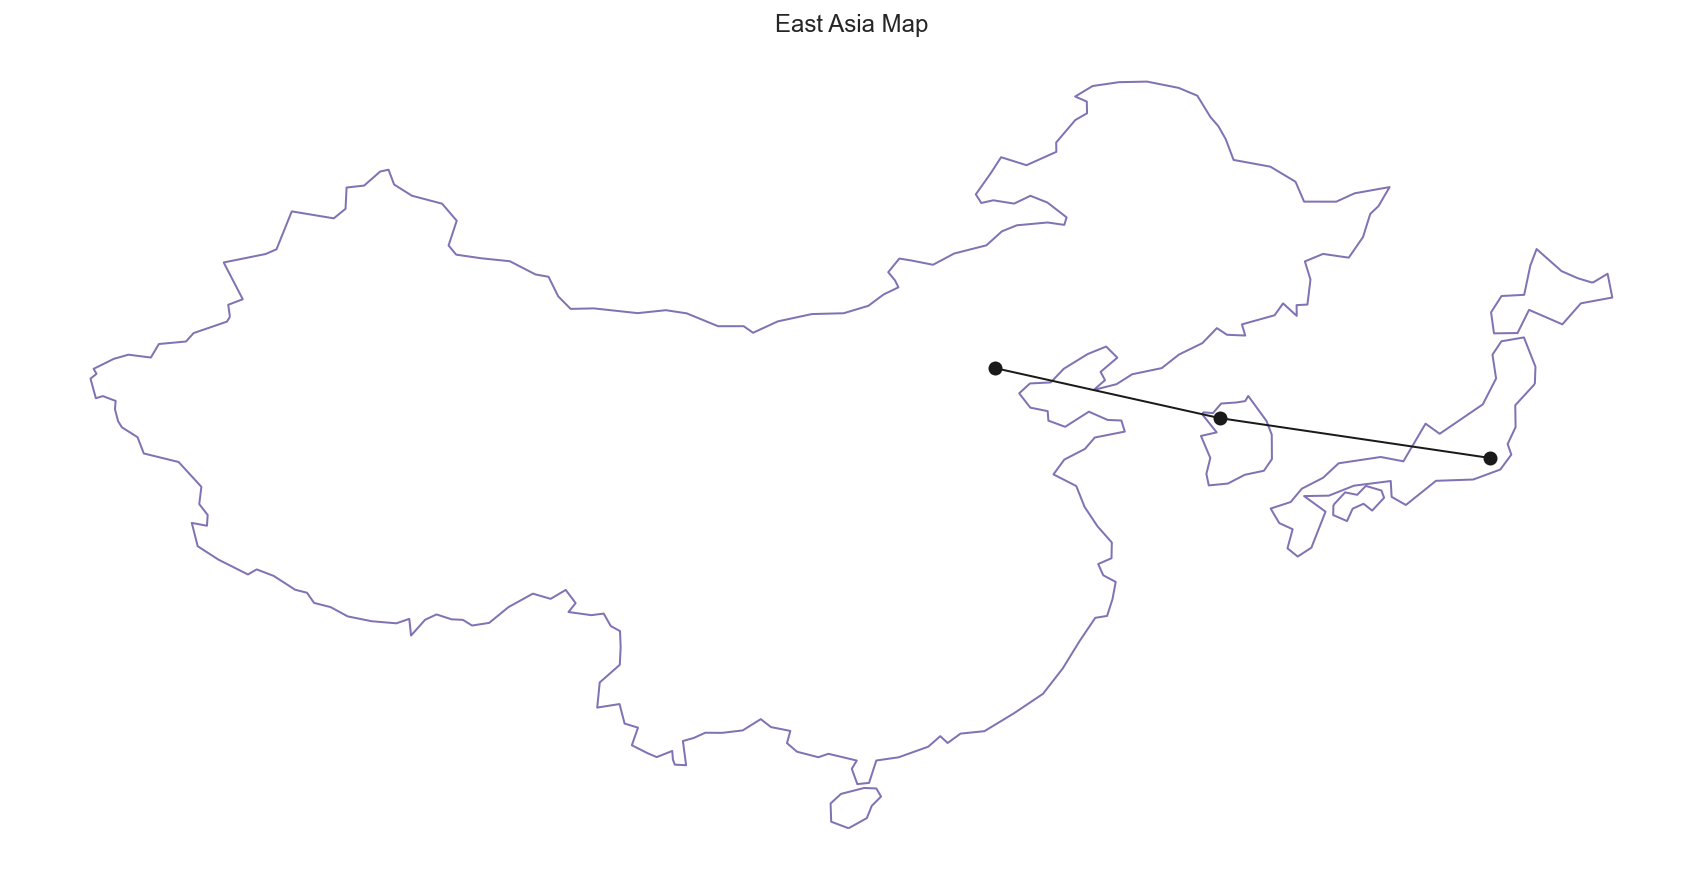

In [27]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("East Asia Map")
ax.set_axis_off()
plt.show()

다음은 기본적인 관계 연산 함수들이다. 관계연산의 출력값은 부울리언 값이다. 
* 기본 관계 연산
  - `within` : 지리적으로 포함되는지 여부
  - `contains` : 지리적으로 포함하고 있는지 여부
  - `intersects` : 지리적으로 교차하는지 여부, 두 지리가 경계선만 닿아있어도, True를 반환
  - `crosses` : 지리적으로 교차하는지 여부, intersects와 차이점은 crosses는 내부를 지나가야만 True를 반환한다는 것이다. 

In [28]:
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

서울은 한국 안에 있다. 

In [29]:
seoul.within(korea)

True

한국은 서울을 포함 하고 있다. 

In [30]:
korea.contains(seoul)

True

중국과 한국의 국경은 맞닿아 있지 않다.

In [31]:
china.intersects(korea)

False

홍콩, 베이징, 토쿄, 서울을 잇는 선은 한국을 지나 간다.

In [32]:
line.crosses(korea)

True

위와 같은 간단한 관계연산을 이용하면 데이터 검색 또한 가능하다. 

In [33]:
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",3.900313


#### 속성을 이용한 연산

서울에서 베이징까지의 거리

In [34]:
seoul.distance(beijing)

10.871264032732043

한국으로 부터 서울과 베이징 간의 거리 보다 가까운 데이터를 찾는다. 

In [36]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

<ipython-input-36-459cd14a4f58>:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",2.632550
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.780 42.220, 130.780 42.220...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.175 37.750, 126.237 37.840, 126....",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.885 39.181, 140.959 38.174...",3.900313


한국의 면적 과 중국 면적의 비율

In [37]:
china.area / korea.area

95.89679828612043

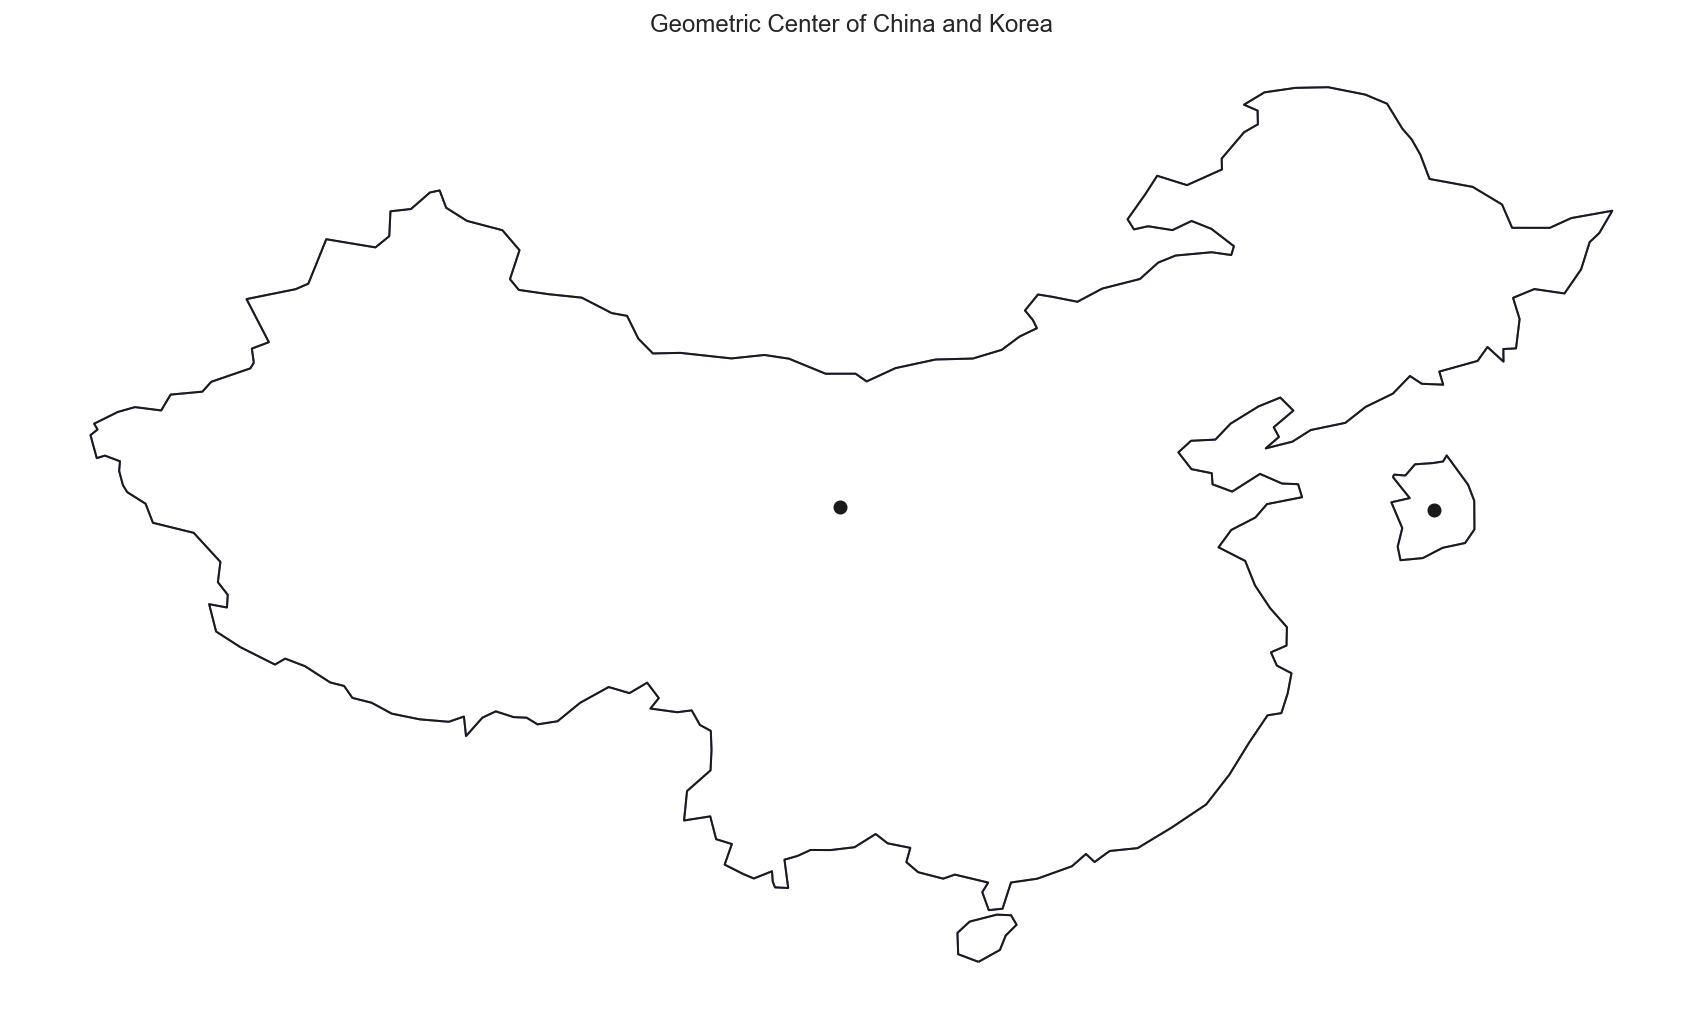

In [39]:
base = northern_asia[northern_asia.name != "Japan"].plot(
    figsize=(15, 15), color="w", edgecolor="m")
ax = gpd.GeoSeries([china.boundary, korea.boundary, china.centroid,
                    korea.centroid]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("Geometric Center of China and Korea")
ax.set_axis_off()
plt.show()

### 지리 정보 조작

이번에는 한국의 기초구역도 데이터를 활용하여 지리정보를 조작하는 예제를 만들었다. 

데이터는 아래의 링크에서 다운로드 할 수 있다.
- http://www.juso.go.kr/addrlink/addressBuildDevNew.do?menu=bsin

다운로드 받은 파일의 압축을 풀면, 다음과 같은 파일 구조를 확인 할 수 있다. 

```
.                                                                                                                                                                                                           
├── 강원도                                                                                                            │   ├── TL_KODIS_BAS_42.dbf                                                                                         │   ├── TL_KODIS_BAS_42.shp                                                                                         │   └── TL_KODIS_BAS_42.shx                                                                                         ├── 경기도                                                                                                             │   ├── TL_KODIS_BAS_41.dbf                                                                                         │   ├── TL_KODIS_BAS_41.shp                                                                                         │   └── TL_KODIS_BAS_41.shx 
.
.
.
```

각 지역 마다 폴더가 나뉘어져 있다. 그 중 우리는 `서울특별시` 데이터를 사용한다. 서울특별시 폴더 안의 파일은 총 3개로, 각 파일의 확장자는 .dbf, .shx, .shp 이다. 이 중 .shp 확장자를 가진 파일을 불러 올 것이다. 

* shape file 이란 ?

> .shp, .shx, .dbf 3개의 파일을 합쳐서 shape file 이라고 한다. shpae file은 GIS에서 사용하는 벡터 형식의 데이터 이다. 
> - .shp : 점, 다각형 등의 지리정보를 담고 있다. 이 때 지리정보의 타입은 혼용되지 않는다. 점과 다각형이 같은 파일에 저장 될 수 없다는 뜻이다. 
> - .shx : 지리정보의 인덱스 정보를 담고 있다. 
> - .dbf : 지리정보의 속성 정보를 담고 있다. 


.shp 파일은 나머지 .dbf, .shx 파일이 없으면 불러올 수 없다. 그리고 "GRS80_UTMK.prj"는 데이터가 사용하는 좌표계 정보가 들어있다. 이 부분은 바로 다음 단락에서 학습할 것이다. 결과적으로 총 4가지 파일이 모두 한 곳에 있도록 한다. 

각 열의 의미는 다음과 같다. 
 - BAS_MGT_SN : 기초구역 관리번호
 - CTP_KOR_NM : 시도명
 - SIG_CD : 시군구코드
 - SIG_KOR_NM : 시군구명
 - BAS_ID : 기초구역번호 본번
 - BAS_AR :  기초구역 면적(km²)
 - NTFC_DE : 고시일자
 - MVMN_DE : 이동일자
 - MVMN_RESN : 이동사유
 - OPERT_DE : 작업일시

In [42]:
seoul_file = "../materials/geodata/서울특별시/11000/TL_KODIS_BAS.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
5662,0.266464,05414,1174000215,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((971485.617 1952675.751, 971012.401 1..."
5663,0.129090,05415,1174000216,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((971012.401 1952516.672, 971485.617 1..."
5664,0.127814,05416,1174000217,서울특별시,20201216,분할에 의한 기초구역 생성,20201216,20201216000000,11740,강동구,"POLYGON ((972009.566 1950230.226, 971960.491 1..."


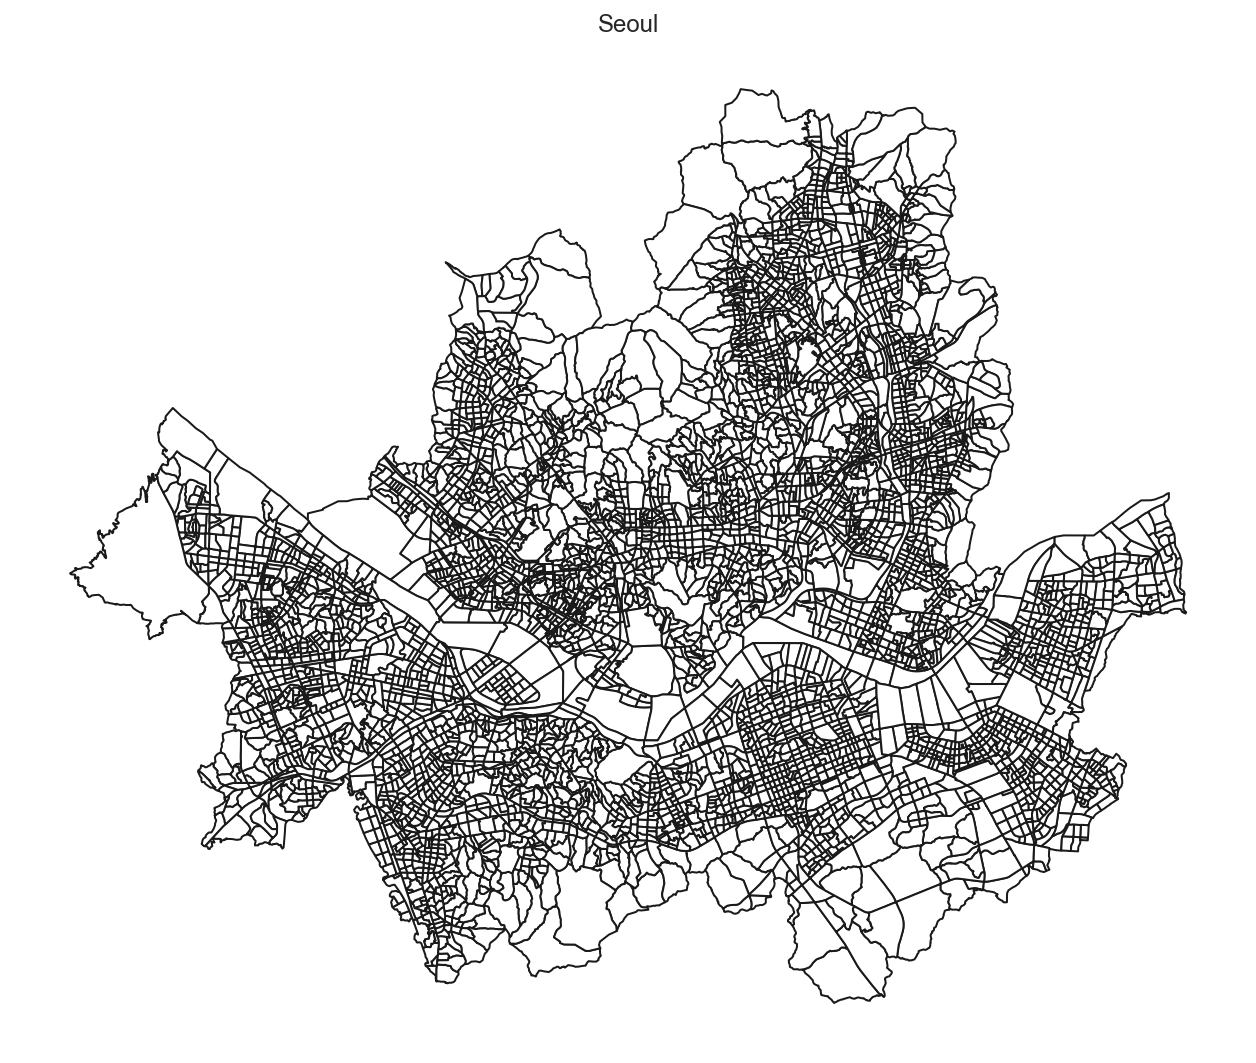

In [43]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("Seoul")
ax.set_axis_off()
plt.show()

***Convex Hull은 그림이 있을때, 오목한 부분 채워주는 것이였지.***

다음 나열된 함수들은 지리정보를 변환하는 기능을 가진다. 

* `convex_hull`
 - Polygon 데이터의 convex hull을 그린다. 

* `envelope` 
 - Polygon 데이터를 감싸는 가장 작은 사각형을 그린다. 

* `simplify`(tolerance, preserve_topology=True)
 - Polygon 데이터에 대해 컨투어 추정을 한다.

* `buffer`(distance, resolution=16)
 - Point, LineString 데이터에 실행하면 주어진 거리 내의 모든 점을 이어 Polygon 데이터를 만들고, Polygon에 적용하면 주어진 거리만큼 확장한다. 
 - 있던, Geometry를 약간 크게 만드는 것. 확장시킨다. 
 
* `unary_union`
 - 여러 개의 geometry 데이터의 합집합을 구한다. 
 - Polygon 내에 빈 곳이 있는 경우, unary_union가 실행 되지 않는다. 이 때는 buffer() 명령으로 Polygon의 빈 곳을 채워준 후 사용한다. 

다음 코드는 동작구의 기초 구역도를 convex_hull, envelope, unary_union을 이용해 변환하는 예이다. 

In [48]:
len(sample)

176

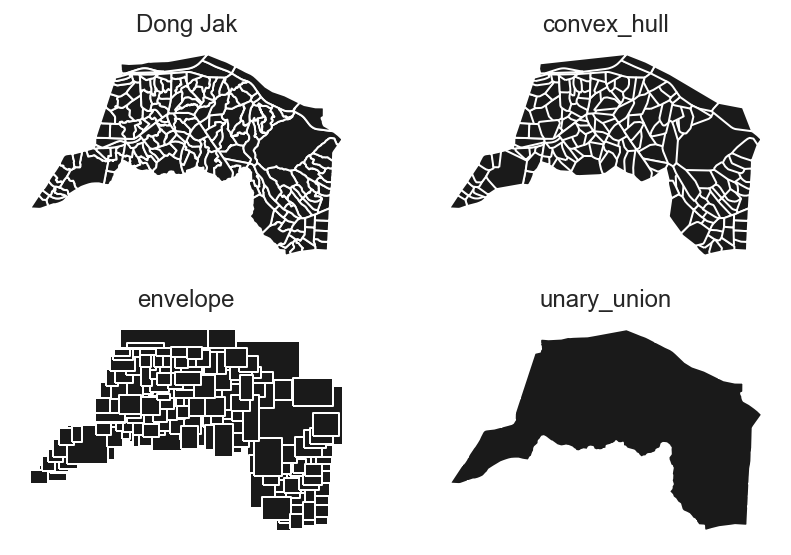

In [49]:
# 176개 있음.
sample = seoul[seoul.SIG_KOR_NM == "동작구"]


ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("Dong Jak")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
# 오목하게 들어간 부분 채워줌. 
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
# 사각형으로 그려준다. 
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.1).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
# 합집합
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

GeoDataFrame 또한 Pandas DataFrame의 groupby 명령과 같은 그룹핑 기능을 제공한다. 

* **Dissolve**
 - GeoDataFrame 내의 geometry를 그룹 별로 unary_union를 이용해 geometry 데이터를 합친다. 

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/

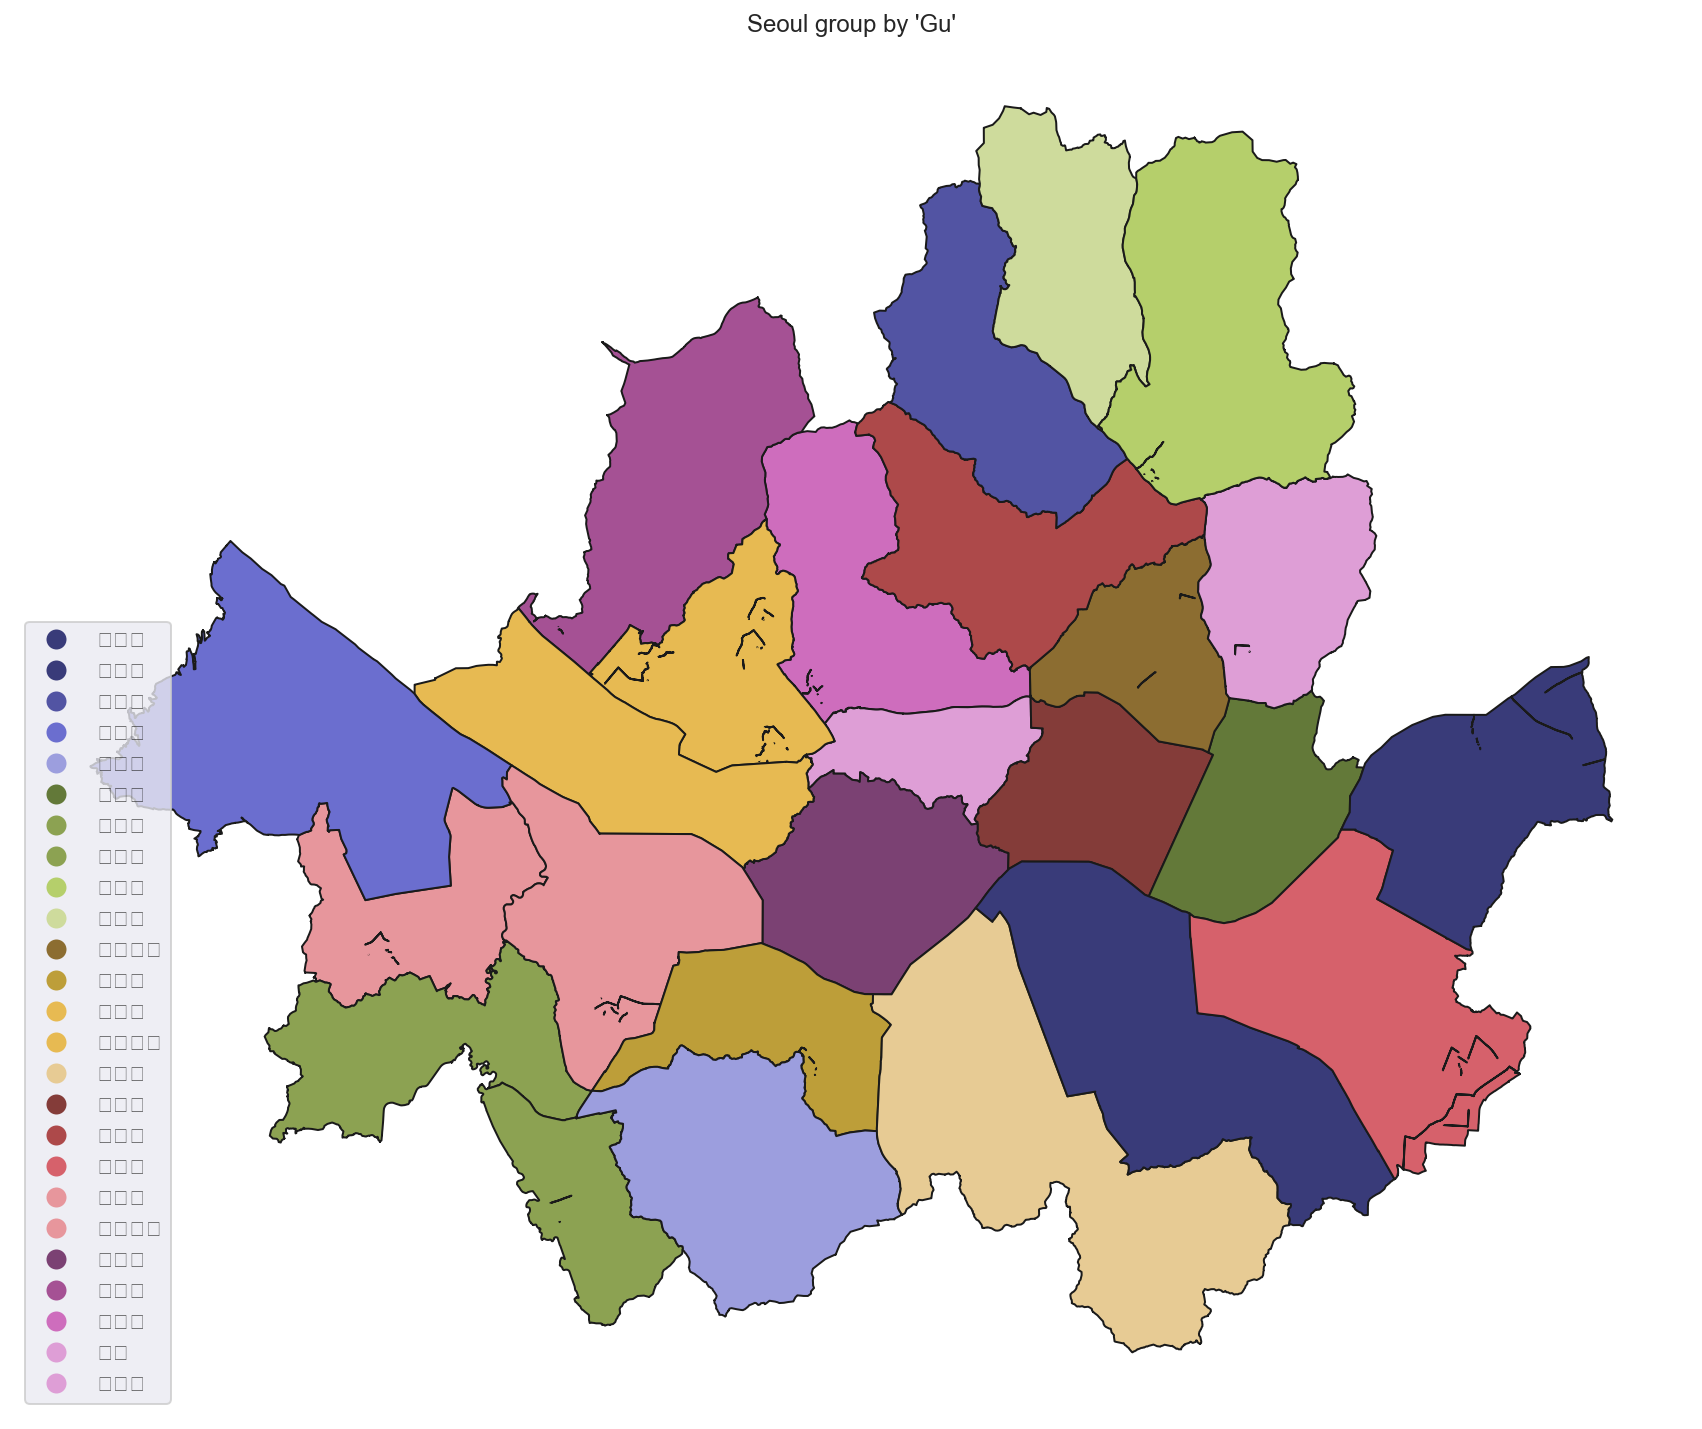

In [52]:
seoul.geometry = seoul.buffer(0.001)
seoul = seoul.dissolve(by='SIG_CD')
ax = seoul.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("Seoul group by 'Gu'")
ax.set_axis_off()
plt.show()

## GeoPandas의 좌표계

#### 좌표계 (Coordinate reference systems)

나라나 서비스마다 사용하는, 좌표계가 조금씩 다르다. 그래도 각 기준을 EPSG로 바꿀 수 있다. <br>
EPSG로 넘버로 어떤 좌표계를 쓸지 정할 수 있다.

`좌표계(CRS)` 는 지구라는 곡면을 2차원 데이터(평면)로 표현하는 방법론을 의미한다. GeoPandas 데이터라면, `crs` 속성값으로 확인 할 수 있다. 좌표계가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현되기 때문에 반드시 통일 시켜주어야 한다. 잘 사용되는 좌표계는 다음과 같다.

* WGS84(EPSG:4326): GPS가 사용하는 좌표계(경도와 위도)
* Bessel 1841(EPSG:4004): 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계
* GRS80 UTM-K(EPSG:5179): 한반도 전체를 하나의 좌표계로 나타낼 때 많이 사용하는 좌표계. 네이버 지도
* GRS80 중부원점(EPSG:5181): 과거 지리원 좌표계에서 타원체 문제를 수정한 좌표계. 다음카카오 지도
* Web mercator projection(Pseudo-Mercator, EPSG:3857) : 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계
* Albers projection(EPSG:9822) : 미국 지질 조사국에서 사용하는 좌표계

GeoPandas는 좌표계 변환 기능을 `to_crs()`라는 함수로 제공한다. 다음 코드는 "epsg:4326" 에서 "epsg:3857"로 변환한다. 
다음 코드의 시각화된 결과를 보면, 남극이 찢어져 있는 것을 볼 수 있다. "epsg:3857", Web mercator projection은 내부적으로 계산이 간단하고 빠르다는 장점이 있지만, 북위 85도, 남위 85도 이상의 지역, 즉 극지방에 대해서는 정보 왜곡이 심하다. 남극 부분이 왜곡된 것은 이 때문이다.

In [56]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
# 이전의 좌표계와 비교해보자.
countries_mercator = countries.to_crs(epsg=3857)
print(countries_mercator.geometry[113])

POLYGON ((2614241.130436479 7153601.785967644, 2619073.309504622 7070435.576908914, 2649953.234787723 6999613.069934945, 2649314.696839432 6926062.815965134, 2582555.841975352 6888660.742470466, 2616898.828923959 6804402.184097362, 2619021.536157463 6724260.516108001, 2675005.782218406 6569348.070398899, 2663069.149401261 6520185.512981648, 2607826.987982927 6499876.023004115, 2506742.403952631 6356150.5315977, 2535459.353843322 6279511.087609826, 2511160.396243507 6289421.884152673, 2405370.190215897 6355008.512342295, 2325236.554002487 6330832.415777704, 2272680.854042278 6348389.632347573, 2206911.445368343 6311783.649685669, 2150771.879265926 6372407.960023718, 2105004.240377634 6349141.515028634, 2098722.407589048 6359484.523483148, 2047489.804278448 6444306.756093704, 1964727.232548202 6454772.762874233, 1954165.469727828 6509230.959613078, 1877822.79304526 6528767.982364263, 1861203.548607317 6483723.521564442, 1800732.279125956 6519788.224792923, 1807675.660239352 6567999.29454

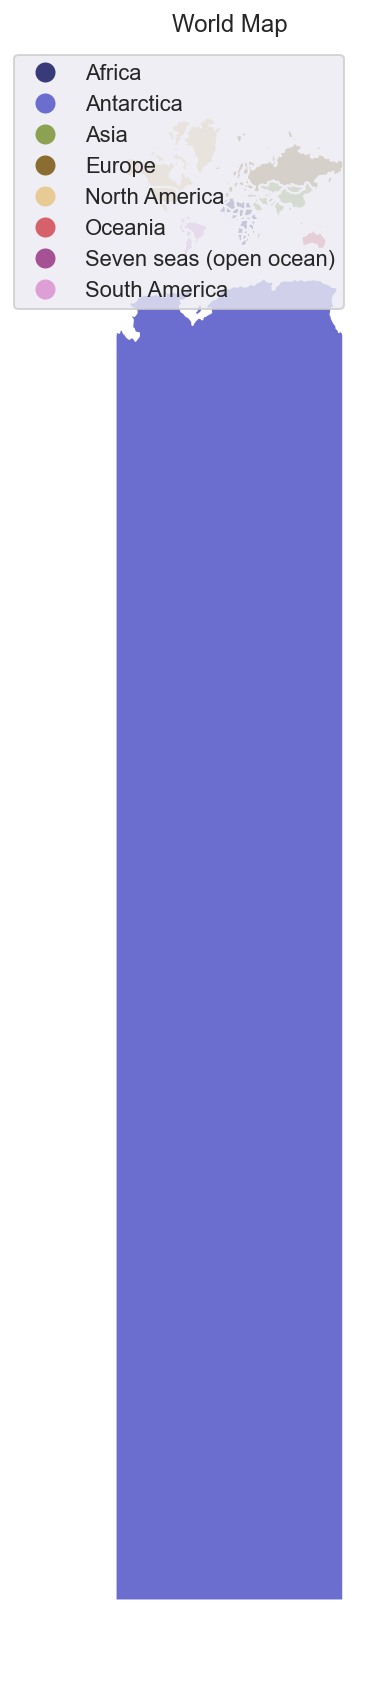

In [59]:
ax = countries_mercator.plot(
    figsize=(15, 15), column='continent', cmap="tab20b", legend=True, categorical=True)
ax.set_title("World Map")
ax.set_axis_off()
plt.show()

## Geocoding 

구글 API이용해서, 위도 경도 입력하면 거기의 주소 알려주는 것. <br>

Geopandas가 제공하는 유용한 기능인 geocoding을 소개 하겠다. 이는 주소를 좌표로 바꾸거나, 좌표를 주소로 바꾸는 기능을 한다. 이 책에서는 geocoding을 위해서 google의 map API를 사용한다. 이 때, API를 사용하기 위해서 접근 키가 필요한데 이는 실습을 원한다면 본인이 직접 만들어야 한다. 만드는 방법은 이 페이지를 참고한다.(https://developers.googleblog.com/2016/03/introducing-google-api-console.html) (이 페이지에 나와 있는 Google Maps Android API 대신에, Geocoding API를 사용하도록 한다.)

In [ ]:
location = gpd.tools.geocode(address, provide = "googlev3", api_keys="your_api_key")
locaion.tail()

다음 예제는 서울열린데이터광장에서 제공하는 "서울시 행정구역 읍면동 위치정보" 데이터를 이용해 서울의 지도를 시각화하고, "서울시 전통시장 현황" 데이터에 있는 전통시장의 주소를 좌표로 바꾸어 지도 위에 점으로 나타내는 것이다. 

* "서울시 행정구역 읍면동 위치정보" 데이터 다운로드 링크

  - https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-13223&srvType=S&serviceKind=1&currentPageNo=1&searchValue=&searchKey=null
  - 위 링크의 "MAP" $\rightarrow$ "TL_SCCO_EMD_2015_W_SHP.zip"을 다운로드 받는다. 

* "서울시 전통시장 현황" 데이터 다운로드 링크

  - http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-1176&srvType=F&serviceKind=1&currentPageNo=1
  - 위 링크의 "File" $\rightarrow$ "contents.xlsx"을 다운로드 받는다. 

In [ ]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("Seoul Traditional Markets")
location.plot(ax=ax, color='r')
ax.set_axis_off()
plt.show()

In [35]:
import geopandas as gpd

seoul_file = "/current_directory/TL_SCCO_EMD_2015_W_SHP/TL_SCCO_EMD_2015_W.shp"
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail()

DriverError: /current_directory/TL_SCCO_EMD_2015_W_SHP/TL_SCCO_EMD_2015_W.shp: No such file or directory

In [ ]:
market_file = "/current_directory/Book/contents.xlsx"
market = pd.read_excel(market_file)
market.tail(3)